<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Capacities" data-toc-modified-id="Capacities-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Capacities</a></span></li><li><span><a href="#length/time" data-toc-modified-id="length/time-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>length/time</a></span></li></ul></li><li><span><a href="#Inverse-demand-shift" data-toc-modified-id="Inverse-demand-shift-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Inverse demand shift</a></span></li><li><span><a href="#From-previous-code" data-toc-modified-id="From-previous-code-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>From previous code</a></span></li></ul></div>

# Description

This notebook enables appropriate vizualisation of cost and inverse demand functions to choose appropriate parameters:
- Inverse demand shifts
- potential shifts
- capacities, lengths/time

Note:
- We will limit the maximum potential demand to 10 currently
- This means that the intersection should happen "before" 10 in order to have a solution

# Load

In [44]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from routines_icu import *
from helpers_icu import *
import cvxpy as cp
from FW_icu import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualizations

## Capacities

In [55]:
phi_ref=phi(10,10)
k_vec=np.linspace(1,20,20)



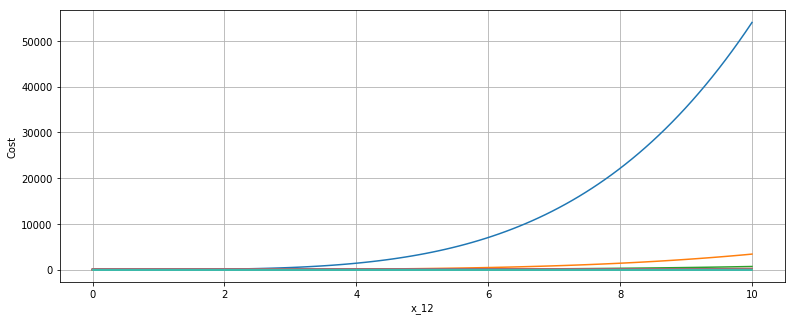

In [38]:
plt.figure(figsize=(13,5))
for k in k_vec:
    C=BPR(phi_ref,x_12,k)
    plt.plot(x_12,C)
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.grid(True)

In [63]:
INVERSE_DEMAND_SHIFT-C1[0]

44.0

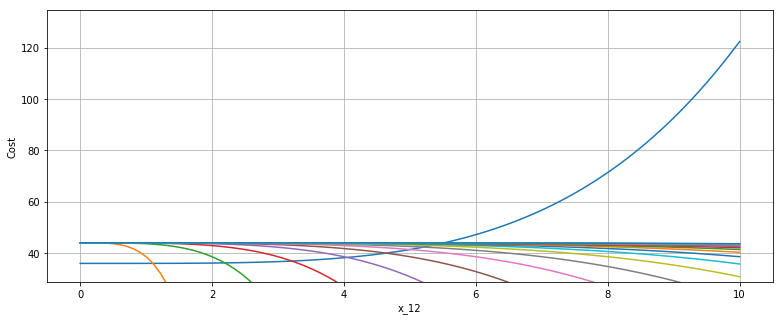

In [59]:

x_12=np.linspace(0,N,100)

C1=BPR(phi(10,10),x_12,5)
C2=[]
for k in k_vec:
    C2_=-BPR(phi_ref,x_12,k)+INVERSE_DEMAND_SHIFT
    C2.append(C2_)

plt.figure(figsize=(13,5))
plt.plot(x_12,C1,label=("C1"))
for C2_ in C2:
    plt.plot(x_12,C2_,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
# plt.legend()
plt.grid(True)
plt.ylim([0.8*C1[0],1.1*C1[-1]]);

## length/time

In [39]:
k_ref=5
phi_vec=np.linspace(1,20,20)

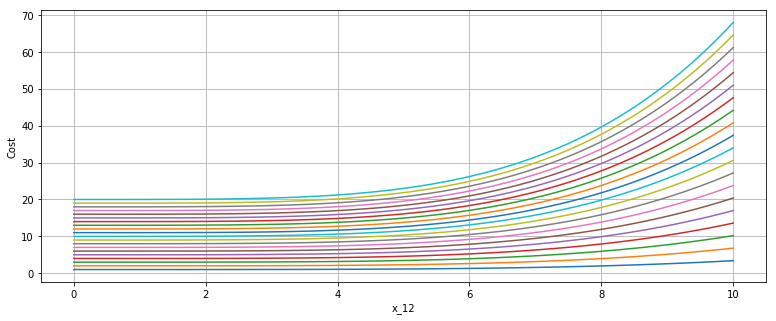

In [40]:
plt.figure(figsize=(13,5))
for phi in phi_vec:
    C=BPR(phi,x_12,k_ref)
    plt.plot(x_12,C)
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.grid(True)



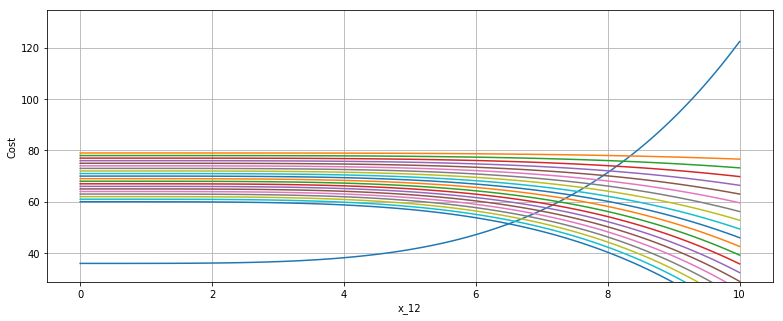

In [58]:

x_12=np.linspace(0,N,100)

C1=BPR(phi(10,10),x_12,5)
C2=[]
for phi_k in phi_vec:
    C2_=-BPR(phi_k,x_12,k_ref)+INVERSE_DEMAND_SHIFT
    C2.append(C2_)

plt.figure(figsize=(13,5))
plt.plot(x_12,C1,label=("C1"))
for C2_ in C2:
    plt.plot(x_12,C2_,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
# plt.legend()
plt.grid(True)
plt.ylim([0.8*C1[0],1.1*C1[-1]]);

# Inverse demand shift

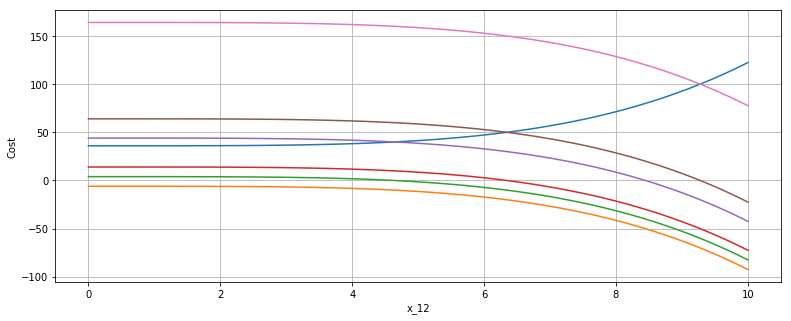

In [65]:
ids_vec=[30,40,50,80,100,200]
x_12=np.linspace(0,N,100)

C1=BPR(phi(10,10),x_12,5)
C2=[]
for ids in ids_vec:
    C2_=-BPR(phi_ref,x_12,k_ref)+ids
    C2.append(C2_)

plt.figure(figsize=(13,5))
plt.plot(x_12,C1,label=("C1"))
for C2_ in C2:
    plt.plot(x_12,C2_,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
# plt.legend()
plt.grid(True)
# plt.ylim([0.8*C1[0],1.1*C1[-1]]);

# From previous code

In [2]:
#parameters
alpha=0.15
beta=4
POTENTIAL_SHIFT=90
INVERSE_DEMAND_SHIFT=80

ZC_EDGE=1

In [3]:
L_dum=10
#to adapt
#to be read from file if necessary
nodes_list=['1','2','2_p','R','1_p']
edge_list=[('1','2'),('2','1'),('2','2_p'),('1','R'),('1','2_p'),('1','1_p'),('2','1_p'),('2','R')]
k_list=[10,10,3,10,ZC_EDGE,2,ZC_EDGE,10] 
l_list=[10,10,1,L_dum,0,1,0,L_dum]
t_list=[10,10,10,10,ZC_EDGE,10,ZC_EDGE,10]
phi_list=[phi(l_list[i],t_list[i]) for i in range(len(l_list))]
is_negative=[0,0,1,0,0,1,0,0]

nodes_pots=[('2_p',POTENTIAL_SHIFT),('1_p',POTENTIAL_SHIFT)]

In [4]:
OD=dict()
N=10
OD[('1','2_p')]=N
OD[('2','R')]=N
OD[('2','1_p')]=N
OD[('1','R')]=N

print(OD)

{('1', '2_p'): 10, ('2', 'R'): 10, ('2', '1_p'): 10, ('1', 'R'): 10}


In [5]:
x_12=np.linspace(0,N,100)

C1=BPR(phi_list[0],x_12,k_list[0])
C2=-BPR(phi_list[2],x_12,k_list[2])+INVERSE_DEMAND_SHIFT
KK=C1-C2

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(x_12,C1,label=("C1"))
plt.plot(x_12,C2,label=("C2"))
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(x_12,KK,label="Total Cost")
plt.plot(x_12,np.ones(x_12.shape)*0,'--')
plt.xlabel("x_12")
plt.ylabel("Cost")
plt.grid(True)

In [7]:
C_T=BPR_int_val(phi_list[0],x_12,k_list[0])+BPR_int_val(phi_list[2],x_12,k_list[2])-INVERSE_DEMAND_SHIFT*x_12

Text(0, 0.5, 'Integral Cost')

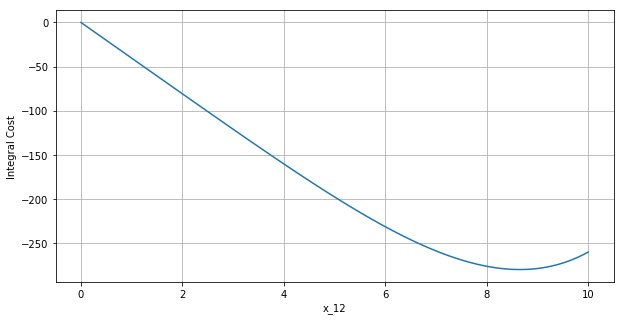

In [8]:
plt.figure(figsize=(10,5))
plt.plot(x_12,C_T)
plt.grid(True)
plt.xlabel("x_12")
plt.ylabel("Integral Cost")

In [9]:
x_12=cp.Variable()
constraints=[x_12>=0,x_12<=10]

C_T=BPR_int(phi_list[0],x_12,k_list[0])+BPR_int(phi_list[2],x_12,k_list[2])-INVERSE_DEMAND_SHIFT*x_12
prob=cp.Problem(cp.Minimize(C_T),constraints)
prob.solve()
print(prob.status)
print("optimal flow value:", x_12.value)

optimal_inaccurate
optimal flow value: 8.649842980893967


In [10]:
x_21=np.linspace(0,N,100)

C1=BPR(phi_list[1],x_21,k_list[1])
C2=-BPR(phi_list[5],x_21,k_list[5])+INVERSE_DEMAND_SHIFT
KK=C1-C2

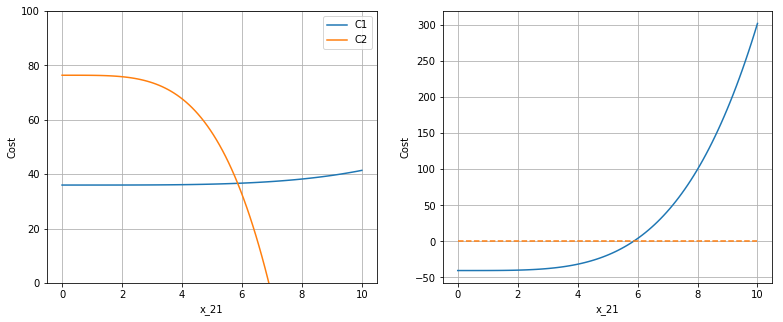

In [11]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(x_21,C1,label=("C1"))
plt.plot(x_21,C2,label=("C2"))
plt.xlabel("x_21")
plt.ylabel("Cost")
plt.ylim([0,100])
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(x_21,KK,label="Total Cost")
plt.plot(x_21,np.ones(x_21.shape)*0,'--')
plt.xlabel("x_21")
plt.ylabel("Cost")
plt.grid(True)



In [12]:
C_T=BPR_int_val(phi_list[1],x_21,k_list[1])+BPR_int_val(phi_list[5],x_21,k_list[5])-INVERSE_DEMAND_SHIFT*x_21

Text(0, 0.5, 'Integral Cost')

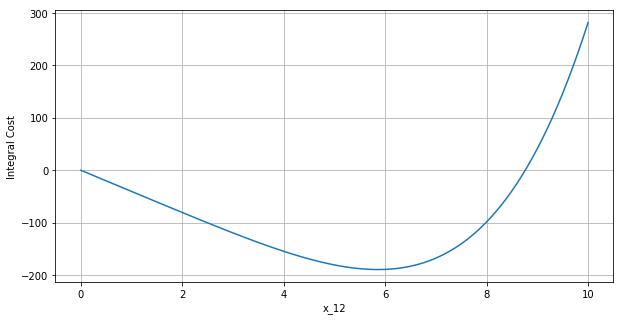

In [13]:
plt.figure(figsize=(10,5))
plt.plot(x_21,C_T)
plt.grid(True)
plt.xlabel("x_12")
plt.ylabel("Integral Cost")

In [14]:
x_21=cp.Variable()
constraints=[x_21>=0,x_21<=10]

C_T=BPR_int(phi_list[1],x_21,k_list[1])+BPR_int(phi_list[5],x_21,k_list[5])-INVERSE_DEMAND_SHIFT*x_21
prob=cp.Problem(cp.Minimize(C_T),constraints)
prob.solve()
print(prob.status)
print("optimal flow value:", x_21.value)

optimal
optimal flow value: 5.858557569350867


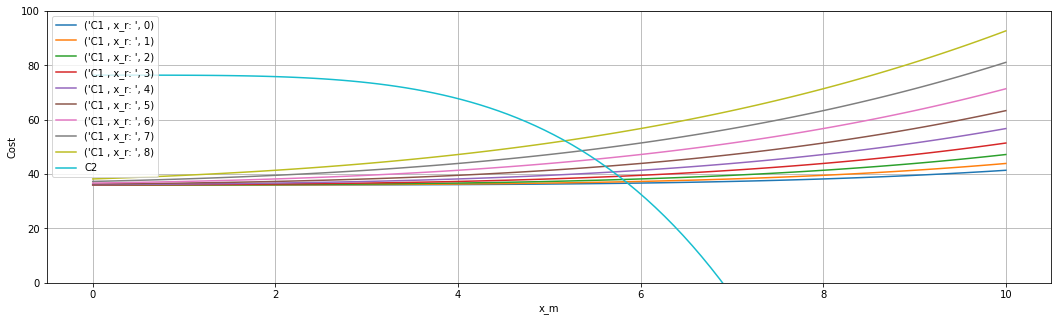

In [16]:
eq=8.64

plt.figure(figsize=(18,5))
x_21=np.linspace(0,N,100)
x_r=[0,1,2,3,4,5,6,7,8]
for x_ in x_r:
    x_m=np.linspace(0,N,100)
    C1=BPR(phi_list[1],x_m+x_,k_list[1])
    plt.plot(x_m,C1,label=("C1 , x_r: ", x_))
    
C2=-BPR(phi_list[5],x_21,k_list[5])+INVERSE_DEMAND_SHIFT
plt.plot(x_21,C2,label=("C2"))
plt.xlabel("x_m")
plt.ylabel("Cost")
plt.ylim([0,100])
plt.grid(True)
plt.legend()